# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 2 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_excel('End_time.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_mass        576 non-null    float64
 1   Standoff_distance  576 non-null    int64  
 2   End_time           576 non-null    float64
 3   End_index          576 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.1 KB


In [4]:
dataset.head()

,Charge_mass,Standoff_distance,End_time,End_index
0,0.5,1,0.01104,1106
1,0.5,7,0.02850,2852
2,0.5,9,0.03447,3449
3,0.5,11,0.04046,4048
4,0.5,13,0.04644,4646


In [3]:
y = dataset['End_time']
X = dataset.drop(['End_time','End_index'], axis=1)
print(X.shape, y.shape)

(576, 2) (576,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Part 3 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=65,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=48,
                              activation='relu'))

### Adding the third hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=30,
                              activation='relu'))

### Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                195       
                                                                 
 dense_1 (Dense)             (None, 48)                3168      
                                                                 
 dense_2 (Dense)             (None, 30)                1470      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [13]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [14]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [15]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=50,
                    verbose=1)

Epoch 1/500
9/9 [==============================] - 1s 37ms/step - loss: 10.3309 - mae: 2.4787 - val_loss: 2.6755 - val_mae: 1.4153
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 2.1264 - mae: 1.2060 - val_loss: 0.4151 - val_mae: 0.5386
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 0.3033 - mae: 0.4335 - val_loss: 0.3736 - val_mae: 0.5073
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2238 - mae: 0.3529 - val_loss: 0.1688 - val_mae: 0.3517
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1320 - mae: 0.2936 - val_loss: 0.0441 - val_mae: 0.1693
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0410 - mae: 0.1563 - val_loss: 0.0262 - val_mae: 0.1309
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0100 - mae: 0.0784 - val_loss: 0.0127 - val_mae: 0.0983
Epoch 8/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - mae: 0.0685 - v

### Analyse learn history

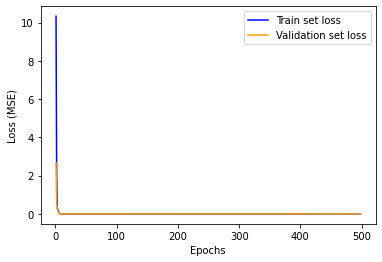

In [16]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

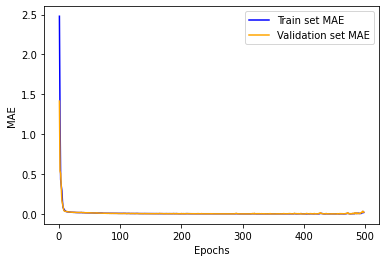

In [17]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [18]:
print (epochs)

range(1, 499)


### Save the model

In [30]:
from keras.models import load_model
ann.save('End_ANN_model_10.h5')

INFO:tensorflow:Assets written to: ram://2dd44ffd-d2a6-4124-ae71-8ba26525bc34/assets


## Part 5 - Make predictions

In [11]:
from keras.models import load_model
import matplotlib.pyplot as plt

In [9]:
ann = load_model('End_ANN_model_10.h5')

3/3 [==============================] - 0s 2ms/step


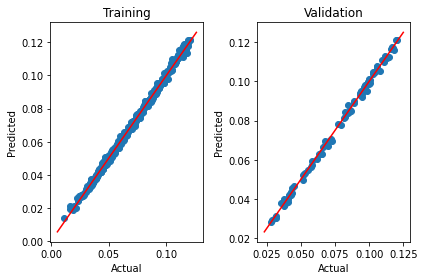

In [12]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [13]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 3ms/step
[[0.1  0.1 ]
 [0.07 0.07]
 [0.1  0.1 ]
 [0.03 0.03]
 [0.05 0.04]
 [0.06 0.06]
 [0.11 0.11]
 [0.09 0.09]
 [0.04 0.04]
 [0.11 0.11]
 [0.06 0.06]
 [0.06 0.06]
 [0.07 0.07]
 [0.11 0.11]
 [0.09 0.09]
 [0.03 0.04]
 [0.08 0.08]
 [0.04 0.05]
 [0.09 0.09]
 [0.06 0.06]
 [0.03 0.03]
 [0.03 0.03]
 [0.1  0.1 ]
 [0.12 0.12]
 [0.03 0.02]
 [0.08 0.08]
 [0.04 0.04]
 [0.04 0.04]
 [0.11 0.11]
 [0.1  0.1 ]
 [0.06 0.06]
 [0.07 0.07]
 [0.04 0.04]
 [0.08 0.08]
 [0.05 0.05]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.06 0.06]
 [0.05 0.05]
 [0.04 0.04]
 [0.08 0.09]
 [0.1  0.1 ]
 [0.07 0.07]
 [0.07 0.07]
 [0.06 0.06]
 [0.06 0.06]
 [0.07 0.07]
 [0.05 0.05]
 [0.08 0.08]
 [0.09 0.09]
 [0.04 0.04]
 [0.04 0.04]
 [0.04 0.04]
 [0.1  0.1 ]
 [0.05 0.05]
 [0.12 0.12]
 [0.11 0.11]
 [0.11 0.11]
 [0.06 0.06]
 [0.08 0.08]
 [0.04 0.04]
 [0.05 0.05]
 [0.1  0.1 ]
 [0.04 0.04]
 [0.09 0.09]
 [0.1  0.1 ]
 [0.11 0.11]
 [0.08 0.08]
 [0.05 0.05]
 [0.1  0.1 ]
 [0.08 0.08]
 [0.11 0.11]
 [0.1  0.1 ]


Text(0, 0.5, 'Predicted data')

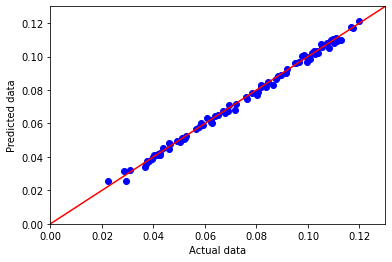

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,0.13],[0,0.13], color = "red")
plt.axis ([0,0.13,0,0.13])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

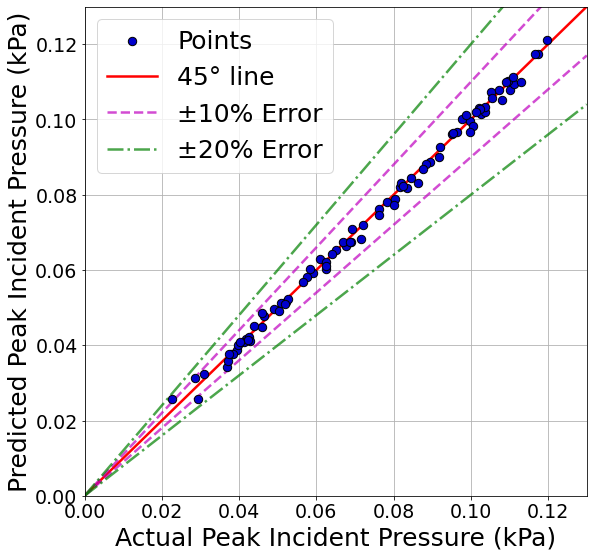

In [15]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,0.13)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 0.13)
plt.xlim(0, 0.13)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [16]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 0s 2ms/step
0.00117812370624579
0.001172372985752243


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.996765053275866


In [18]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9967966500828905


In [19]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 97.70%
Within 20% margin 100.00%
Out of 20% margin 0.00%


In [20]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9966880307348152


In [21]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.0015141821172921315

In [22]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.001172372985752243